In [97]:
%run boilerplate.ipynb

The watermark extension is already loaded. To reload it, use:
  %reload_ext watermark
Python implementation: CPython
Python version       : 3.8.5
IPython version      : 7.18.1

numpy     : 1.19.2
matplotlib: 3.3.2
pyNN      : 0.9.5
neo       : 0.8.0
moviepy   : 1.0.3
imageio   : 2.9.0

Compiler    : GCC 9.3.0
OS          : Linux
Release     : 5.4.0-53-generic
Machine     : x86_64
Processor   : x86_64
CPU cores   : 4
Architecture: 64bit

Hostname: inv-ope-de06

Git hash: 86c603b01839836c34aed85113ac4396634bf68b

Git repo: https://github.com/SpikeAI/2020-11_brainhack_Project7

Git branch: main



In [111]:
simtime = 1000 # ms
time_bins = 100
N_pop = 128**2
width = int(np.sqrt(N_pop))

input_movie = generate_dot( width, width,
                            time_bins,
                            flash_start=0.2,
                            flash_duration=0.6,
                            dot_size = 0.1,
                            im_noise = .1,
                            im_contrast = .9)
minmax(input_movie)
input_movie.shape

movie.min()=-0.5390007424376607 - movie.max()=1.0 


(128, 128, 100)

In [112]:
input_movie_spikes = (input_movie > np.random.rand(width, width, time_bins))*1.
input_movie_spikes[..., :2] = 0 # avoid having a spike at the first time bin

In [113]:
minmax(input_movie), minmax(input_movie_spikes)

movie.min()=-0.5390007424376607 - movie.max()=1.0 
movie.min()=0.0 - movie.max()=1.0 


(None, None)

In [114]:
show(make_mp4(f'{output_dir}/poisson.mp4', generate_images(input_movie_spikes, label='spikes', output_dir=output_dir, verbose=False), fps), width=width)

t:  61%|██████    | 61/100 [00:00<00:00, 599.45it/s, now=None]

Moviepy - Building video output/poisson.mp4.
Moviepy - Writing video output/poisson.mp4



Moviepy - Done !
Moviepy - video ready output/poisson.mp4


In [136]:
cellSourceSpikes = []
for i in range(N_pop):
    row = i//width
    col = i%width
    spike_times = np.where(input_movie_spikes[row, col, :]==True)[0]
    cellSourceSpikes.append(spike_times)

cellSourceSpikes = [list(elem) for elem in cellSourceSpikes]
len(cellSourceSpikes), cellSourceSpikes[0], np.sum([len(st) for st in cellSourceSpikes])

(16384, [71], 75751)

In [116]:
try:
    import pyNN.spiNNaker as sim
    simulator = 'spinnaker'
except ModuleNotFoundError:
    import pyNN.nest as sim
    simulator = 'nest'

In [117]:
sim.setup(timestep=1,
          min_delay=1,
          max_delay=100,
          debug=0)

sources = sim.SpikeSourceArray(spike_times=cellSourceSpikes)
spikeSource = sim.Population(N_pop, sources)    
spikeSource.record(['spikes'])

In [118]:
sim.run(simtime=simtime)

1000.0

In [119]:
spikeSources  = spikeSource.get_data()#.segments[0].spiketrains
S_spikes = spikeSources.segments[0].spiketrains

In [120]:
sim.end()

In [129]:
st = S_spikes[0]
st

SpikeTrain
annotations: {'source_population': 'population10',
  'source_id': 16387,
  'source_index': 0}

In [130]:
st.as_array()

array([71.])

In [131]:
st.magnitude 

array([71.])

In [135]:
all_spikes = np.hstack([st.magnitude for st in S_spikes])
len(all_spikes)

75751

TypeError: sort() got an unexpected keyword argument 'axis'

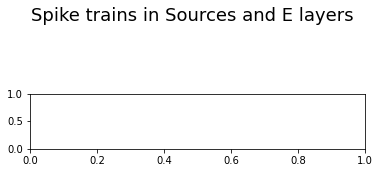

In [125]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(6,12))
fig.suptitle("Spike trains in Sources and E layers", fontsize=18)

ax = fig.add_subplot(10,1,1)
inSpikes = spikeSource.get_data().segments[0].spiketrains
im = plt.eventplot(inSpikes, colors='blue')
ax.set_title("Spikes in Sources Layer ", y=1.10, fontsize=16)
ax.set_xlabel("[ms]", fontsize=14); 
ax.set_ylabel("neurons", fontsize=14)


In [126]:
segment.spiketrains ['spike_times']

TypeError: list indices must be integers or slices, not str

In [127]:
st.annotations['source_id']

16387

In [128]:
np.sum([np.sum(st.as_array()) for st in inSpikes])

3798295.0

In [ ]:
for i in range(N_pop): # loops over sources
    S_spike_train = S_spikes[i].as_array() # makes as array each source
    S_spike_times = [int(t) for t in S_spike_train]
    S_spk_list.append(S_spikes[i].as_array())
    for spike_time in S_spike_times: # loops over spikes for each source
            #print(spike_time, i)
            S_binMat[spike_time-1, i-1] = 1 # the -1 in the args traslates the values in list indeces
                            # (e.g. 50th cell spikes at 1000ms -> E_binMat[49, 999])

In [ ]:
output_spike = np.zeros((width, width, time_bins))
for i in range(N_pop):
    row = i//width
    col = i%width
    output_spike[row, col, :] 
    spike_times = np.where(input_movie_spikes[row, col, :]==True)[0]
    cellSourceSpikes.append(spike_times)

cellSourceSpikes = [list(elem) for elem in cellSourceSpikes]
len(cellSourceSpikes)

In [ ]:
plt.eventplot(E_spikes, colors='red')


In [ ]:
fig = plt.figure(figsize=(6,12))
fig.suptitle("Spike trains in Sources and E layers", fontsize=18)

ax = fig.add_subplot(4,1,1)
im = plt.eventplot(inSpikes, colors='blue')
ax.set_title("Spikes in Sources Layer ", y=1.10, fontsize=16)
ax.set_xlabel("[ms]", fontsize=14); 
ax.set_ylabel("neurons", fontsize=14)
#spikeSourceTimes[-1]

ax = fig.add_subplot(4,1,2)
im = plt.eventplot(E_spikes, colors='red')
ax.set_title("Spikes in E Layer ", y=1.10, fontsize=16)
ax.set_xlabel("[ms]", fontsize=14); 
ax.set_ylim(350,550)

ax.set_ylabel("neurons", fontsize=14)
fig.suptitle("Spike trains in Sources and E layers", fontsize=18)

ax = fig.add_subplot(4,1,3)
im=ax.matshow(E_v.T); fig.colorbar(im)
ax.set_title("[mV] in E layer", fontsize=14,y=1.15)
ax.set_xlabel("[ms]", fontsize=14); 
ax.set_ylabel("neurons", fontsize=14)
#ax.set_ylim(0,len(spikeSourceTimes))  

ax = fig.add_subplot(4,1,4)
im=ax.matshow(E_gsynE.T); fig.colorbar(im)
ax.set_title(" Exc [uS] in E layer", fontsize=14,y=1.15)
ax.set_xlabel("[ms]", fontsize=14); 
ax.set_ylabel("neurons", fontsize=14)
#ax.set_ylim(0,len(spikeSourceTimes))  

fig.subplots_adjust(hspace=0.75,wspace=0)

In [ ]:
E_varV = []
for i in range(len(E_v)):
    E_varV.append([np.var(E_v[i])])
a=np.asarray(E_varV)
a=a
a.resize(30,30)
plt.matshow(a)
a.shape

In [ ]:
E_var_gsynE = []
for i in range(len(E_gsynE.T)):
    c = E_gsynE.T
    E_var_gsynE.append([np.var(c[i])])
b=np.asarray(E_var_gsynE)
b.resize(30,30)
plt.matshow(b)
b.shape
len(E_gsynE)

TypeError: sort() got an unexpected keyword argument 'axis'

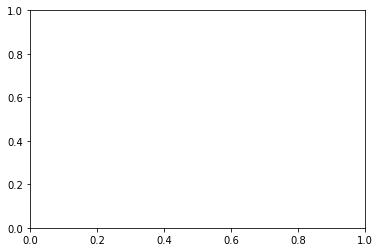

In [122]:
plt.eventplot(spikeSources.segments[0].spiketrains, colors='black')